# Biodiversidad en parques nacionales (USA)

En este proyecto se analizarán los datos relacionados con especies en peligro de extinción de la biodiversidad en parque nacionales de los Estados Unidos.


In [1]:
#Bibliotecas externas:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
#Importación de los datos disponibles:
especies = pd.read_csv("species_info.csv")
observaciones = pd.read_csv("observations.csv")
#Se unifican ambas tablas en una sola llamada "datos"
datos = especies.merge(observaciones)
datos

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128
...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Bryce National Park,111


In [3]:
datos.describe(include="all")

,category,scientific_name,common_names,conservation_status,park_name,observations
count,25632,25632,25632,880,25632,25632.000000
unique,7,5541,5504,4,4,NaN
top,Vascular Plant,Castor canadensis,Dicranum Moss,Species of Concern,Bryce National Park,NaN
freq,19560,36,28,732,6408,NaN
mean,NaN,NaN,NaN,NaN,NaN,142.214693
std,NaN,NaN,NaN,NaN,NaN,69.912475
min,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,86.000000
50%,NaN,NaN,NaN,NaN,NaN,124.000000
75%,NaN,NaN,NaN,NaN,NaN,195.000000


#### Datos faltantes:

In [4]:
print(datos.isna().sum())

category                   0
scientific_name            0
common_names               0
conservation_status    24752
park_name                  0
observations               0
dtype: int64


## Distribución del estatus de conservación

In [5]:
#separación de los datos según el reino
animales_cat = ['Mammal','Bird','Reptile','Amphibian','Fish']
plantas_cat = ['Vascular Plant','Nonvascular Plant']
datos_animales = datos[(datos.category != 'Vascular Plant') & (datos.category != 'Nonvascular Plant')]
datos_plantas = datos[(datos.category == 'Vascular Plant') | (datos.category == 'Nonvascular Plant')]

### Estatus de conservación según la clase de animal

A continuación, se evalúa la relación que existe entre el estatus de conservación de cada especie, y su clasificación. Para ello, se ha graficado un mapa de calor con las frecuencias observadas y otro con las frecuencias que esperaríamos si no hubiese ninguna relación entre la clasificación de los animales y su estatus de conservación.

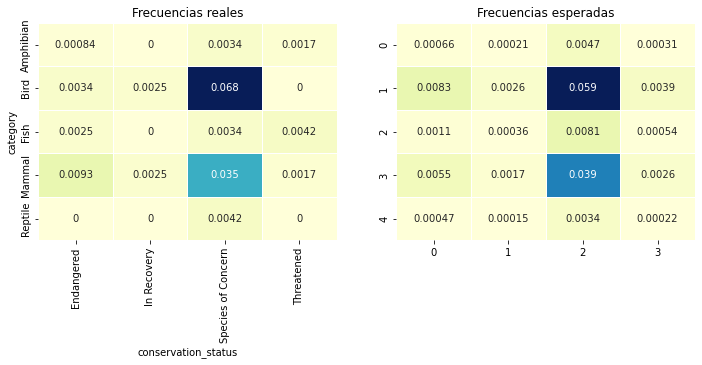

In [6]:
contingencia_animales = pd.crosstab(datos_animales.category,datos_animales.conservation_status)
chi2 = chi2_contingency(contingencia_animales)
plt.subplot(1,2,1)
plt.title("Frecuencias reales")
sns.heatmap(contingencia_animales/len(datos_animales),annot=True,linewidths=0.5,cmap="YlGnBu",cbar=False)
plt.subplot(1,2,2)
plt.title("Frecuencias esperadas")
sns.heatmap(chi2[3]/len(datos_animales),annot=True,linewidths=0.5,cmap="YlGnBu",cbar=False)
plt.subplots_adjust(
    left=0.25,
    right=1.77,
    wspace=0.2,
    hspace=0.2
)
plt.show()
plt.close()

Para evaluar la hipótesis nula de que **no hay ninguna relación entre la clasificación del animal y su estatus de conservación** se ha realizado el test del Chi cuadrado, con un umbral de p establecido en 0.05

In [7]:
print(chi2[1])
print(chi2[1]<0.05)

2.841850507285727e-43
True


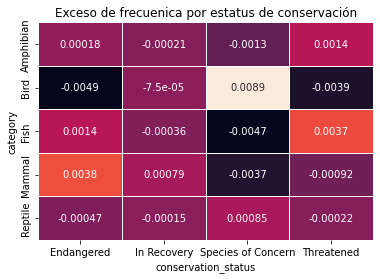

In [8]:
sns.heatmap((contingencia_animales-chi2[3])/len(datos_animales),annot=True,linewidths=0.5,cbar=False)
plt.title("Exceso de frecuenica por estatus de conservación")
plt.show()
plt.close()

*Debido a que el valor de p es menor al umbral establecido se rechaza la hipótesis nula establecida.*

### Estatus de conservación según la clase de planta

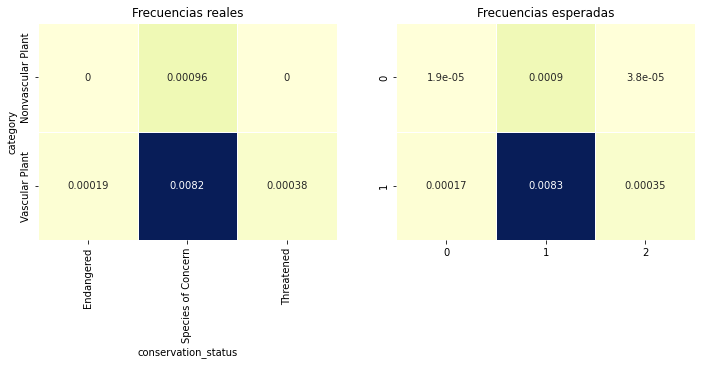

In [9]:
contingencia_plantas = pd.crosstab(datos_plantas.category,datos_plantas.conservation_status)
chi2 = chi2_contingency(contingencia_plantas)
plt.subplot(1,2,1)
plt.title("Frecuencias reales")
sns.heatmap(contingencia_plantas/len(datos_plantas),annot=True,linewidths=0.5,cmap="YlGnBu",cbar=False)
plt.subplot(1,2,2)
plt.title("Frecuencias esperadas")
sns.heatmap(chi2[3]/len(datos_plantas),annot=True,linewidths=0.5,cmap="YlGnBu",cbar=False)
plt.subplots_adjust(
    left=0.25,
    right=1.77,
    wspace=0.2,
    hspace=0.2
)
plt.show()
plt.close()

Para evaluar la hipótesis nula de que **no hay ninguna relación entre la clasificación de la planta y su estatus de conservación** se ha realizado el test del Chi cuadrado, con un umbral de p establecido en 0.05

In [10]:
print(chi2[1])
print(chi2[1]<0.05)

0.5001062102546457
False


*Debido a que el valor de p es mayor al umbral establecido se acepta la hipótesis nula establecida.*

## Frecuencias de observaciones por parque

In [11]:
#customización de gráficos:
plt.rc('figure',facecolor="whitesmoke")
plt.rc('axes',grid=True)
plt.rc('axes.grid',axis="y")
plt.rc('grid',linestyle="--")

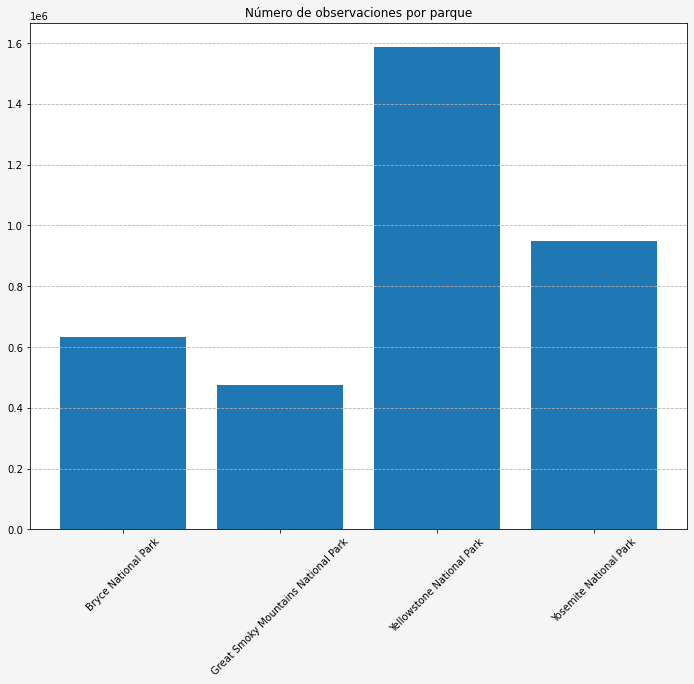

In [12]:
suma_observaciones = pd.DataFrame(datos.groupby(["park_name"]).observations.sum().reset_index())
plt.bar(suma_observaciones.park_name,suma_observaciones.observations)
plt.title("Número de observaciones por parque")
plt.xticks(rotation=45)
plt.subplots_adjust(
    left=0.25,
    right=1.77,
    bottom=0.24,
    top=2,
)
plt.show()
plt.close()

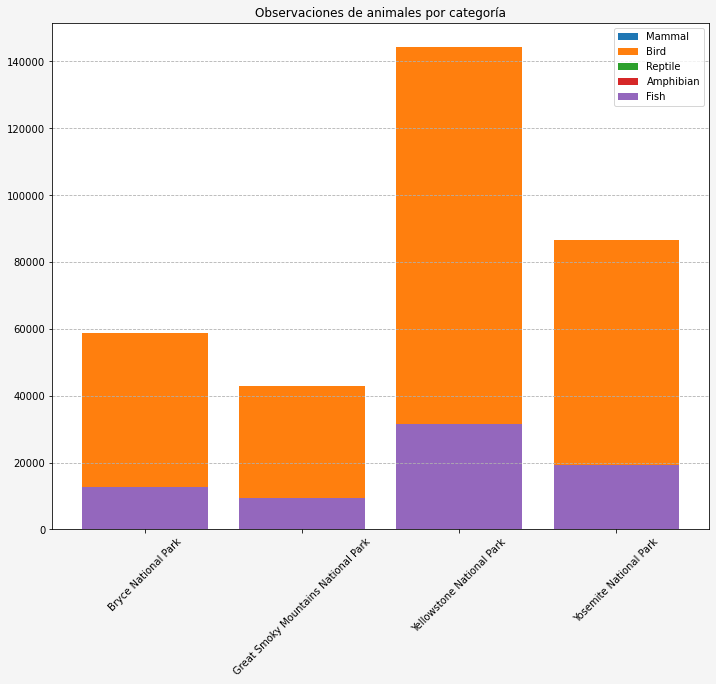

In [13]:
for category in datos_animales.category.unique():
    table = datos[datos.category == category].groupby(["park_name"]).observations.sum().reset_index()
    plt.bar(table.park_name,table.observations)
plt.legend(datos_animales.category.unique())
plt.subplots_adjust(
    left=0.25,
    right=1.77,
    bottom=0.24,
    top=2,
)
plt.xticks(rotation=45)
plt.title("Observaciones de animales por categoría")
plt.show()
plt.close()

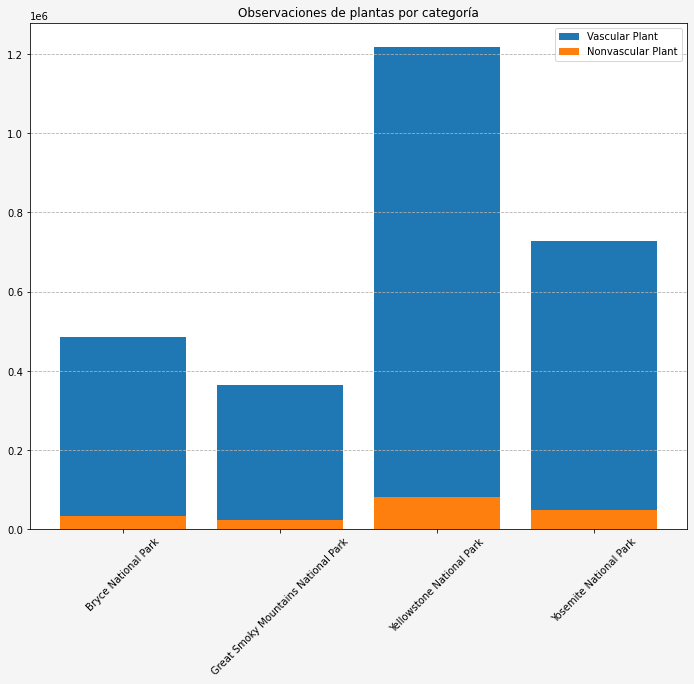

In [14]:
for category in datos_plantas.category.unique():
    table = datos[datos.category == category].groupby(["park_name"]).observations.sum().reset_index()
    plt.bar(table.park_name,table.observations)
plt.legend(datos_plantas.category.unique())
plt.subplots_adjust(
    left=0.25,
    right=1.77,
    bottom=0.24,
    top=2,
)
plt.xticks(rotation=45)
plt.title("Observaciones de plantas por categoría")
plt.show()
plt.close()

In [15]:
for park in datos.park_name.unique():
    tabla = datos[datos.park_name == park]
    anotacion = tabla[tabla.observations == tabla.observations.max()]
    print("En el parque {} la especie más vista fue {}, nombre común: {} con un total de {} observaciones.\n".format(
        anotacion.iloc[0]["park_name"],anotacion.iloc[0]["scientific_name"],
        anotacion.iloc[0]["common_names"],anotacion.iloc[0]["observations"]
    ))

En el parque Bryce National Park la especie más vista fue Valerianella radiata, nombre común: Beaked Corn-Salad, Corn Salad con un total de 176 observaciones.

En el parque Yellowstone National Park la especie más vista fue Lycopodium tristachyum, nombre común: Deep-Root Clubmoss, Ground Cedar con un total de 321 observaciones.

En el parque Great Smoky Mountains National Park la especie más vista fue Sonchus asper ssp. asper, nombre común: Spiny Sowthistle con un total de 147 observaciones.

En el parque Yosemite National Park la especie más vista fue Ivesia shockleyi var. shockleyi, nombre común: Shockley's Ivesia, Sky Mousetail con un total de 223 observaciones.

